In [1]:
!pip install -q yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta


end = datetime.now()
start = end - timedelta(days=365)

# User input tickers
tickers = input("Enter stock ticker(s), separated by commas: ").upper().split(",")
tickers = [t.strip() for t in tickers]

# Download data
data = yf.download(tickers, start=start, end=end, group_by='ticker')

# Build combined DataFrame
df_list = []
for ticker in tickers:
    temp_df = data[ticker].copy()
    temp_df['ticker'] = ticker
    temp_df.reset_index(inplace=True)
    df_list.append(temp_df)

df = pd.concat(df_list, ignore_index=True)
print(df.tail(10))



Enter stock ticker(s), separated by commas: TCS.NS,INFY.NS,TSLA,AMZN


/tmp/ipython-input-2057783852.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start, end=end, group_by='ticker')
[*********************100%***********************]  4 of 4 completed

Price       Date        Open        High         Low       Close      Volume  \
1034  2026-01-01         NaN         NaN         NaN         NaN         NaN   
1035  2026-01-02  231.339996  235.460007  224.699997  226.500000  51456200.0   
1036  2026-01-05  228.839996  234.000000  227.179993  233.059998  49733300.0   
1037  2026-01-06  232.100006  243.179993  232.070007  240.929993  53764700.0   
1038  2026-01-07  239.610001  245.289993  239.520004  241.559998  42236500.0   
1039  2026-01-08  243.059998  246.410004  241.880005  246.289993  39509800.0   
1040  2026-01-09  244.570007  247.860001  242.240005  247.380005  34560000.0   
1041  2026-01-12  246.729996  248.940002  245.960007  246.470001  35867800.0   
1042  2026-01-13  246.529999  247.660004  240.250000  242.600006  38371800.0   
1043  2026-01-14  241.149994  241.279999  236.220001  236.649994  41331000.0   

Price ticker  
1034    AMZN  
1035    AMZN  
1036    AMZN  
1037    AMZN  
1038    AMZN  
1039    AMZN  
1040    AMZN  

In [4]:
# Let user choose ticker
ticker = input("Enter stock ticker: ").upper()

# Get data for chosen ticker
df[df['ticker'] == ticker].describe()

# Or for specific columns
df[df['ticker'] == ticker][['Open', 'High', 'Low', 'Close', 'Volume']].describe()




Enter stock ticker: TCS.NS


Price,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,3324.593308,3350.155521,3296.322505,3321.626383,2.653847e+06
std,295.280742,298.342756,290.113442,292.371290,1.258194e+06
min,2880.257593,2904.467428,2855.948356,2877.667236,0.000000e+00
25%,3097.721893,3120.910042,3075.778341,3099.191040,1.826759e+06
50%,3249.768515,3281.114107,3221.000000,3247.160400,2.512003e+06
75%,3448.254866,3480.014120,3421.702362,3442.812866,3.113043e+06
max,4116.799845,4149.656933,4074.500056,4106.749512,8.817365e+06


In [5]:
# Let user choose ticker
ticker = input("Enter stock ticker: ").upper()

# Get data for chosen ticker
df[df['ticker'] == ticker].info()

# Or for specific columns
df[df['ticker'] == ticker][['Open', 'High', 'Low', 'Close', 'Volume']].info()

Enter stock ticker: TCS.NS
<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    261 non-null    datetime64[ns]
 1   Open    251 non-null    float64       
 2   High    251 non-null    float64       
 3   Low     251 non-null    float64       
 4   Close   251 non-null    float64       
 5   Volume  251 non-null    float64       
 6   ticker  261 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 16.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 0 to 260
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    251 non-null    float64
 1   High    251 non-null    float64
 2   Low     251 non-null    float64
 3   Close   251 non-null    float64
 4   Volume  251 non-null    float64
dtypes: float64(5)
memory usage: 12.2 KB


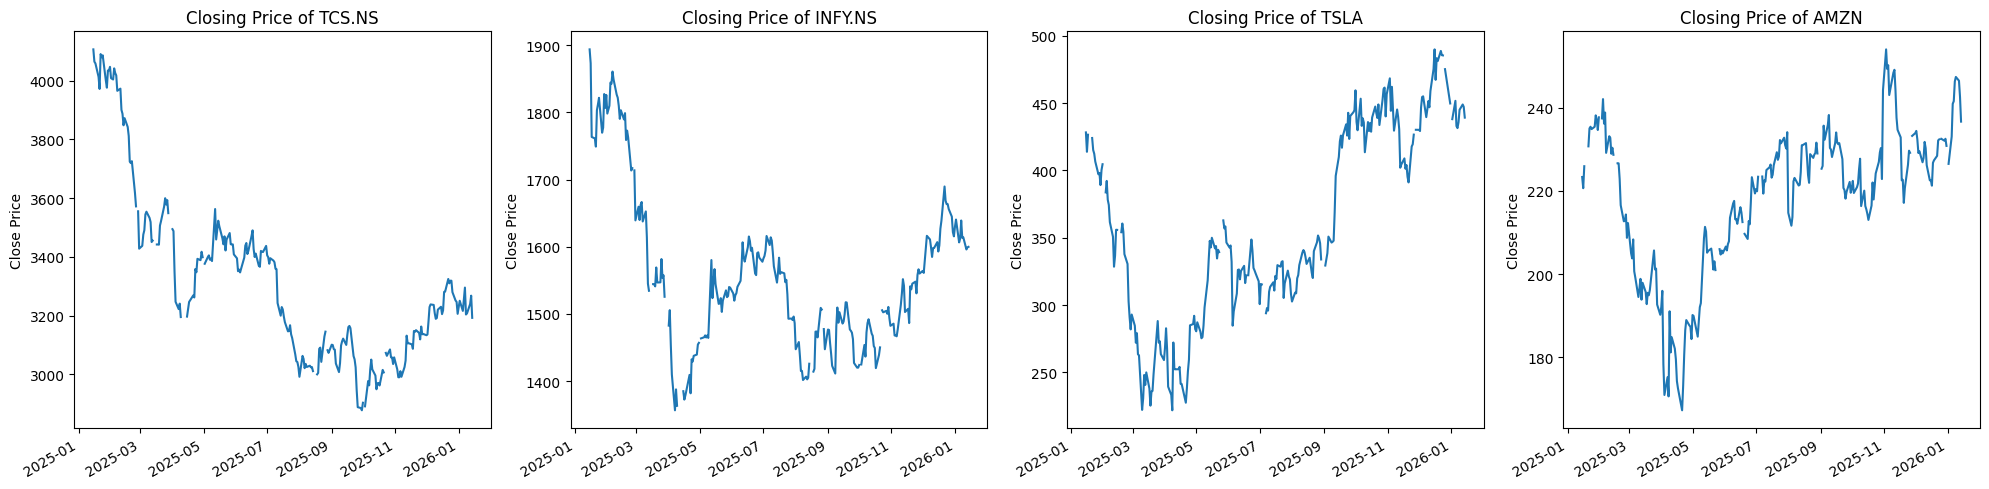

In [6]:


# Assume you already have `tickers` (list of symbols) and `data` from yfinance
n = len(tickers)

# Create subplots dynamically based on how many tickers you entered
fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(5*n, 5))

# If only one ticker, axes is not iterable, so wrap it
if n == 1:
    axes = [axes]

for i, ticker in enumerate(tickers):
    data[ticker]['Close'].plot(ax=axes[i])
    axes[i].set_ylabel('Close Price')
    axes[i].set_xlabel(None)
    axes[i].set_title(f"Closing Price of {ticker}")

plt.tight_layout()
plt.show()



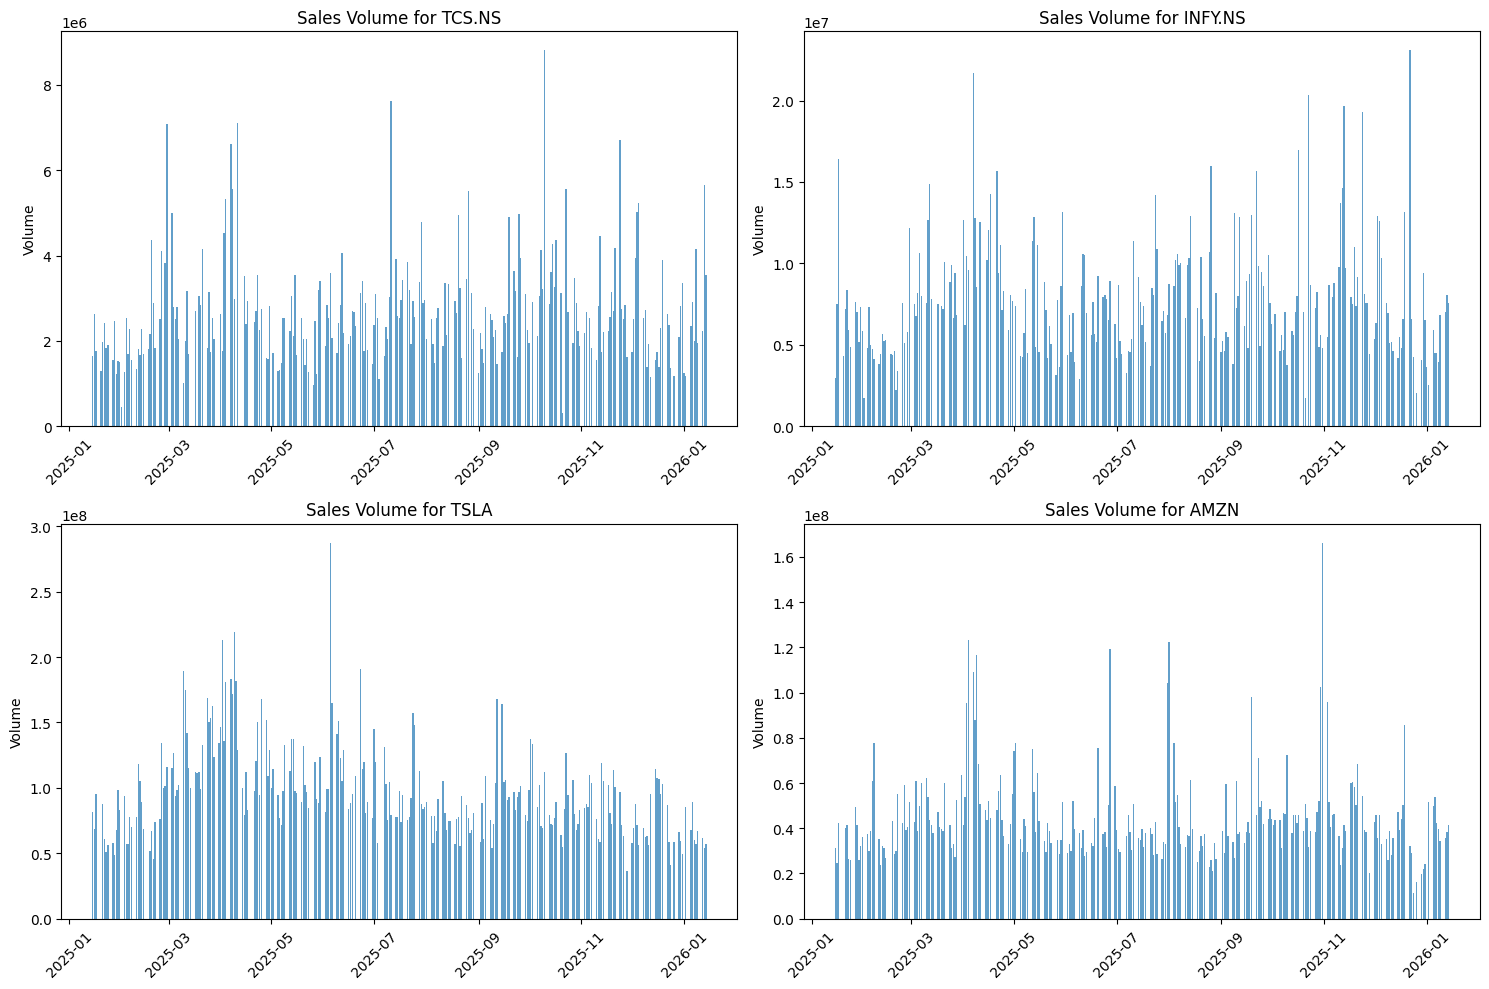

In [7]:
n = len(tickers)

# Calculate rows/cols automatically (here: 2 columns, rows = ceil(n/2))
cols = 2
rows = (n + 1) // cols

plt.figure(figsize=(15, 5*rows))

for i, ticker in enumerate(tickers, 1):
    plt.subplot(rows, cols, i)
    company_data = df[df['ticker'] == ticker]
    plt.bar(company_data['Date'], company_data['Volume'], alpha=0.7)
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {ticker}")   # use ticker directly
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


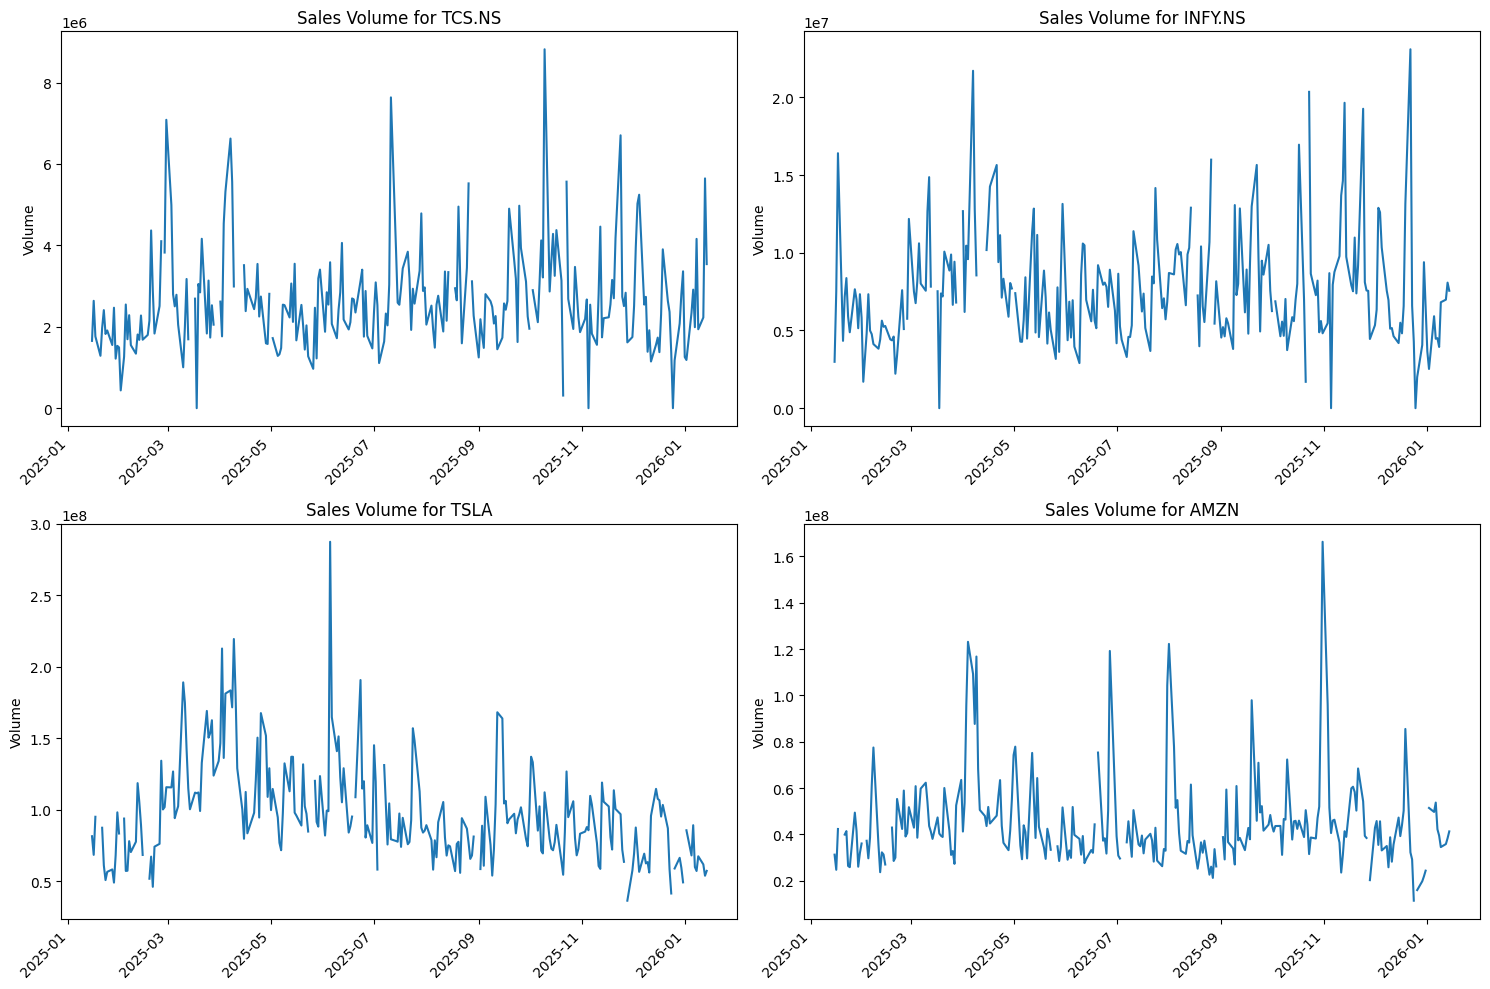

In [8]:
# Assume you already have `tickers` (list of symbols) and `data` from yfinance
n = len(tickers)

# Calculate rows/cols automatically (here: 2 columns, rows = ceil(n/2))
cols = 2
rows = (n + 1) // cols

plt.figure(figsize=(15, 5*rows))

for i, ticker in enumerate(tickers, 1):
    plt.subplot(rows, cols, i)
    data[ticker]['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {ticker}")   # use ticker directly
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


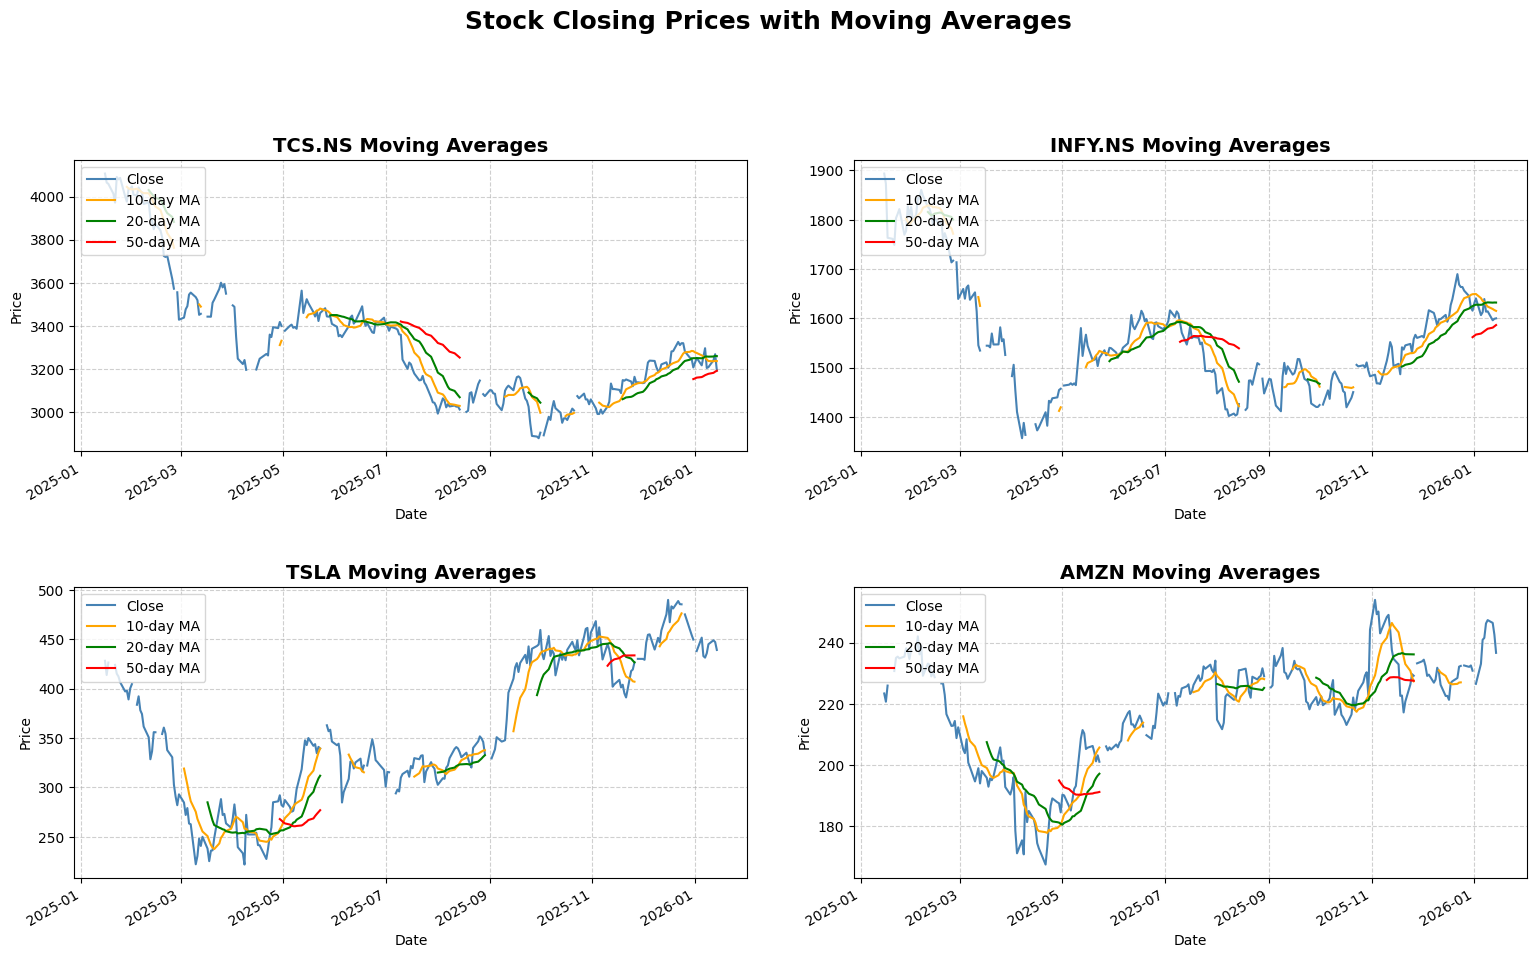

In [17]:
# Calculate moving averages
ma_day = [10, 20, 50]
for ma in ma_day:
    df[f'MA_{ma}'] = df.groupby('ticker')['Close'].transform(lambda x: x.rolling(ma).mean())

# Number of tickers
n = len(tickers)
cols = 2
rows = (n + 1) // cols

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 5*rows))
axes = axes.flatten()

# Define colors for consistency
colors = {
    'Close': 'steelblue',
    'MA_10': 'orange',
    'MA_20': 'green',
    'MA_50': 'red'
}

for i, ticker in enumerate(tickers):
    company_data = df[df['ticker'] == ticker].set_index('Date')

    # Plot each line with custom colors and linewidth
    for col, label in colors.items():
        company_data[col].plot(ax=axes[i], color=colors[col], linewidth=1.5)

    axes[i].set_title(f"{ticker} Moving Averages", fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Price')
    axes[i].grid(True, linestyle='--', alpha=0.6)  # subtle grid
    axes[i].legend(['Close', '10-day MA', '20-day MA', '50-day MA'], loc='upper left')

# Hide unused subplot slots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

# Add a main title
fig.suptitle("Stock Closing Prices with Moving Averages", fontsize=18, fontweight='bold')

# Adjust spacing
fig.tight_layout(pad=3.0, rect=[0, 0, 1, 0.96])
plt.show()

/tmp/ipython-input-3843762687.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Daily Return'] = df.groupby('ticker')['Close'].transform(lambda x: x.pct_change())


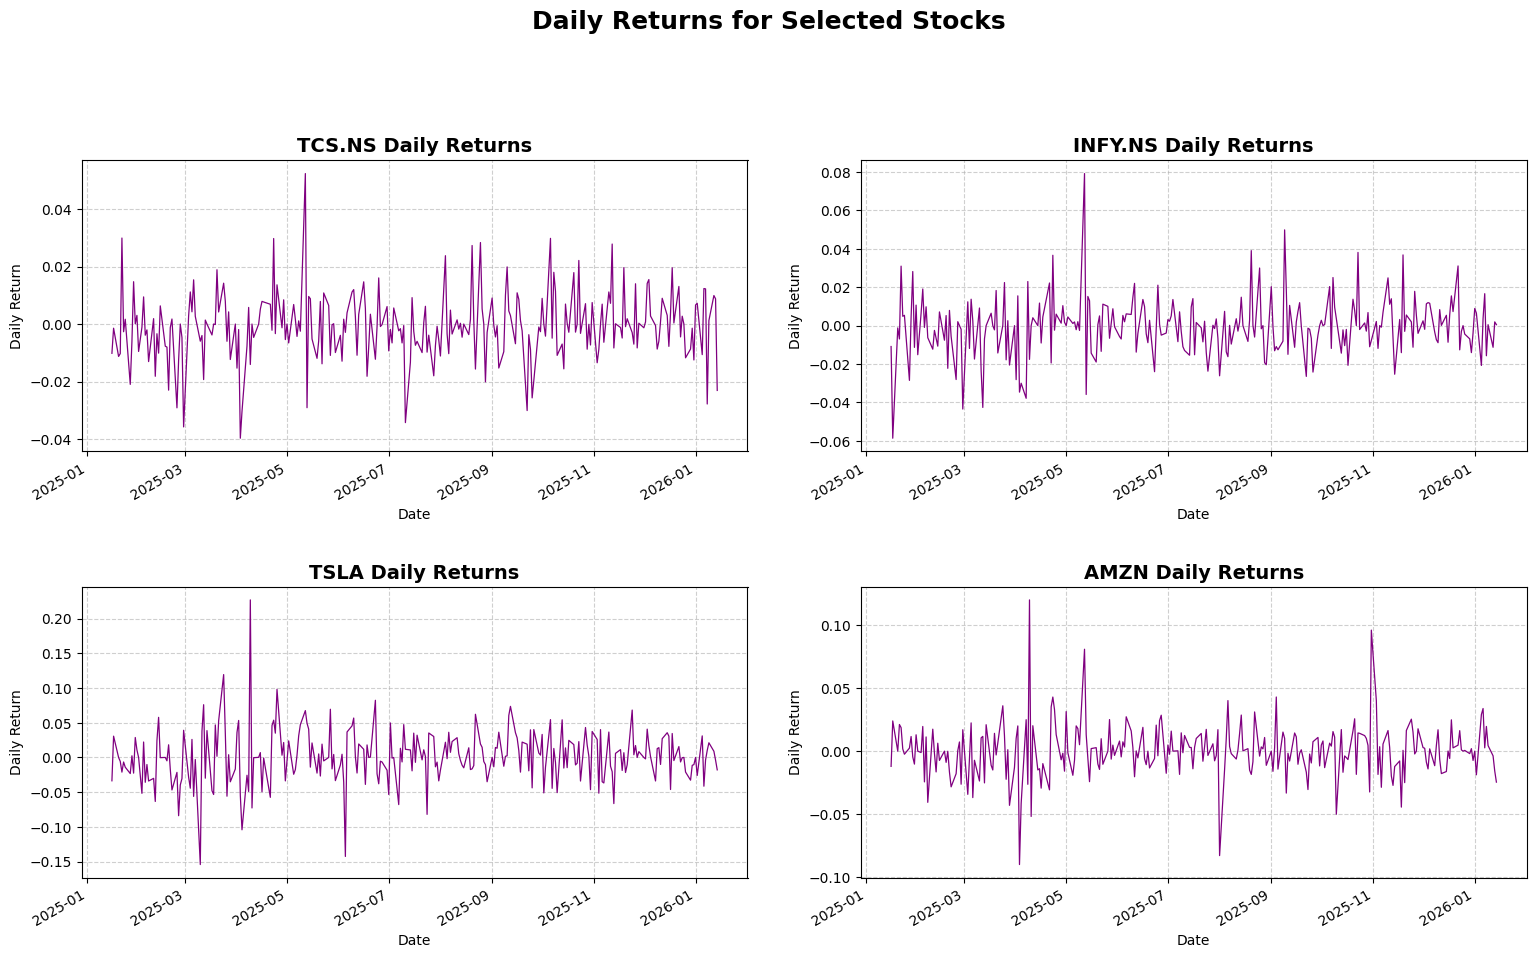

In [18]:
# Calculate daily returns
df['Daily Return'] = df.groupby('ticker')['Close'].transform(lambda x: x.pct_change())

# Number of tickers
n = len(tickers)   # dynamic list of tickers
cols = 2
rows = (n + 1) // cols

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 5*rows))
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    company_data = df[df['ticker'] == ticker].set_index('Date')

    # Plot daily returns with styling
    company_data['Daily Return'].plot(
        ax=axes[i],
        legend=False,
        linewidth=0.9,
        color='purple'
    )

    axes[i].set_title(f"{ticker} Daily Returns", fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Daily Return')
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Hide unused subplot slots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

# Add a main title
fig.suptitle("Daily Returns for Selected Stocks", fontsize=18, fontweight='bold')

# Adjust spacing
fig.tight_layout(pad=3.0, rect=[0, 0, 1, 0.96])
plt.show()


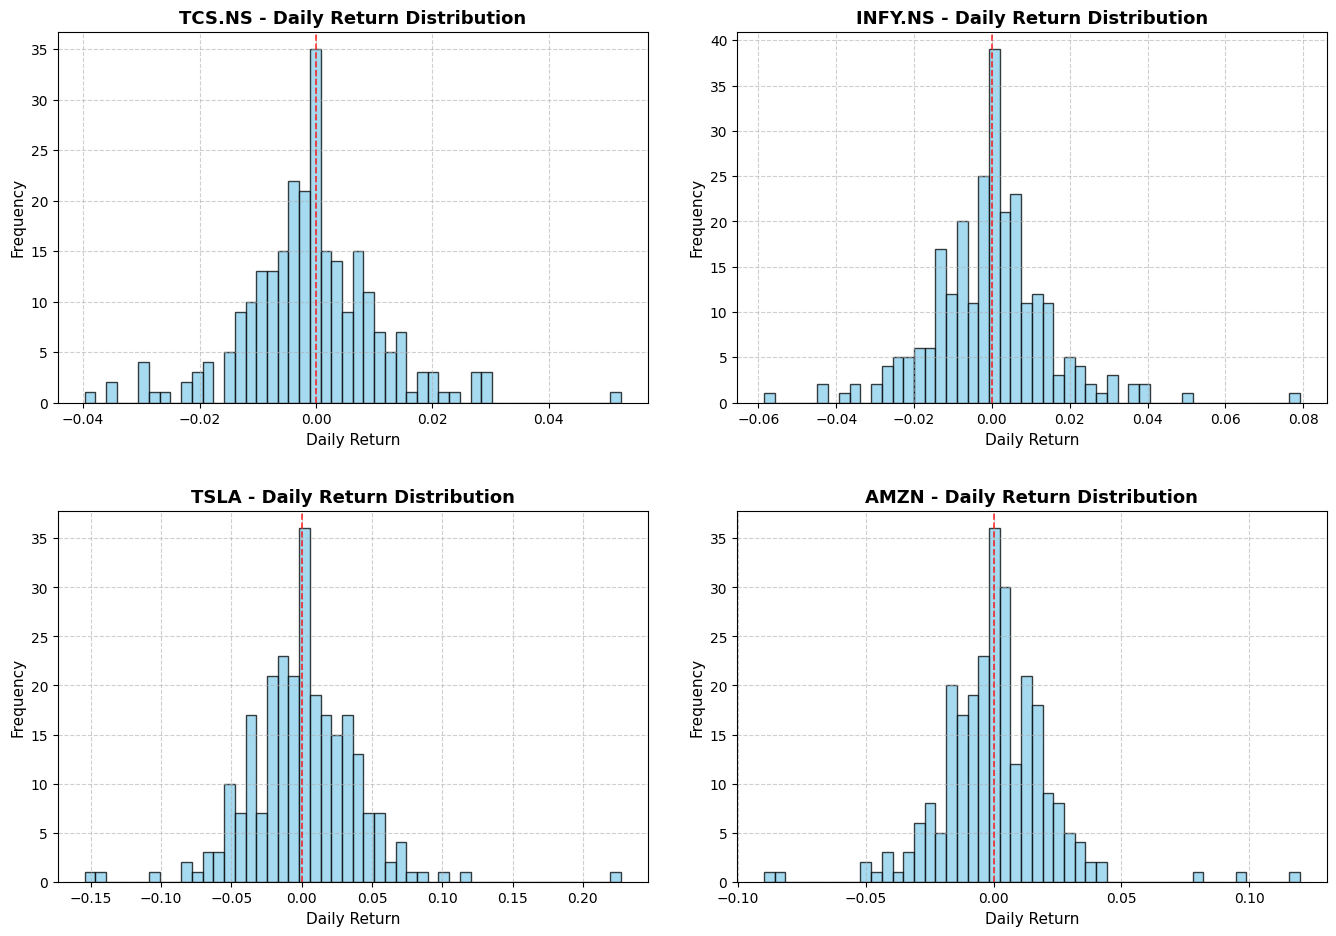

In [20]:
plt.figure(figsize=(14, 10))

for i, ticker in enumerate(tickers, 1):   # <-- use tickers instead of tech_tickers
    plt.subplot(2, 2, i)

    company_data = df[df['ticker'] == ticker]

    # Histogram with styling
    company_data['Daily Return'].hist(
        bins=50,
        alpha=0.75,
        edgecolor='black',
        color='skyblue'
    )
    plt.xlabel('Daily Return', fontsize=11)
    plt.ylabel('Frequency', fontsize=11)
    plt.title(f'{ticker} - Daily Return Distribution', fontsize=13, fontweight='bold')

    # Zero reference line
    plt.axvline(0, color='red', linestyle='--', linewidth=1.2, alpha=0.8)

    # Grid for readability
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(pad=3.0)
plt.show()

In [21]:
# Create closing prices DataFrame (wide format: Date × tickers)
closing_df = df.pivot(index='Date', columns='ticker', values='Close')

# Calculate daily returns for all tickers
daily_returns = closing_df.pct_change()

# Preview results
daily_returns.head()

/tmp/ipython-input-1701396337.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = closing_df.pct_change()


ticker,AMZN,INFY.NS,TCS.NS,TSLA
Date,,,,
2025-01-15,NaN,NaN,NaN,NaN
2025-01-16,-0.012044,-0.010874,-0.010189,-0.033628
2025-01-17,0.023928,-0.058596,-0.001453,0.030641
2025-01-20,0.000000,-0.001184,-0.011275,0.000000
2025-01-21,0.021112,-0.006949,-0.010287,-0.005698


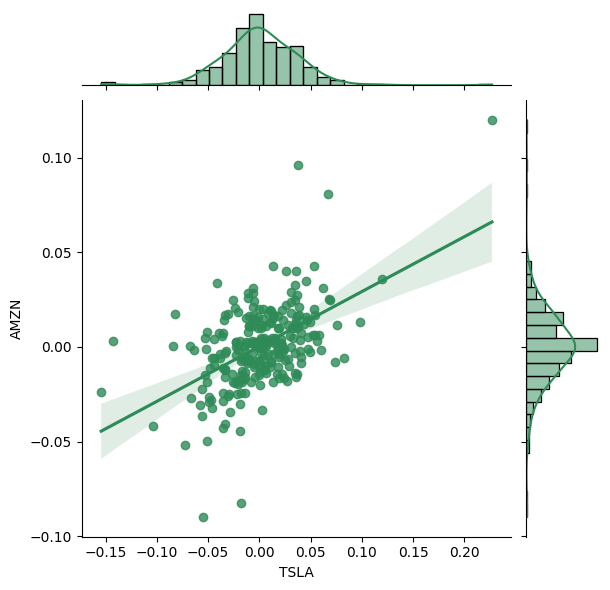

In [22]:
ticker_x, ticker_y = 'TSLA', 'AMZN'  # choose any two tickers

sns.jointplot(
    x=ticker_x,
    y=ticker_y,
    data=daily_returns,
    kind='reg',
    color='seagreen'
)
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector,

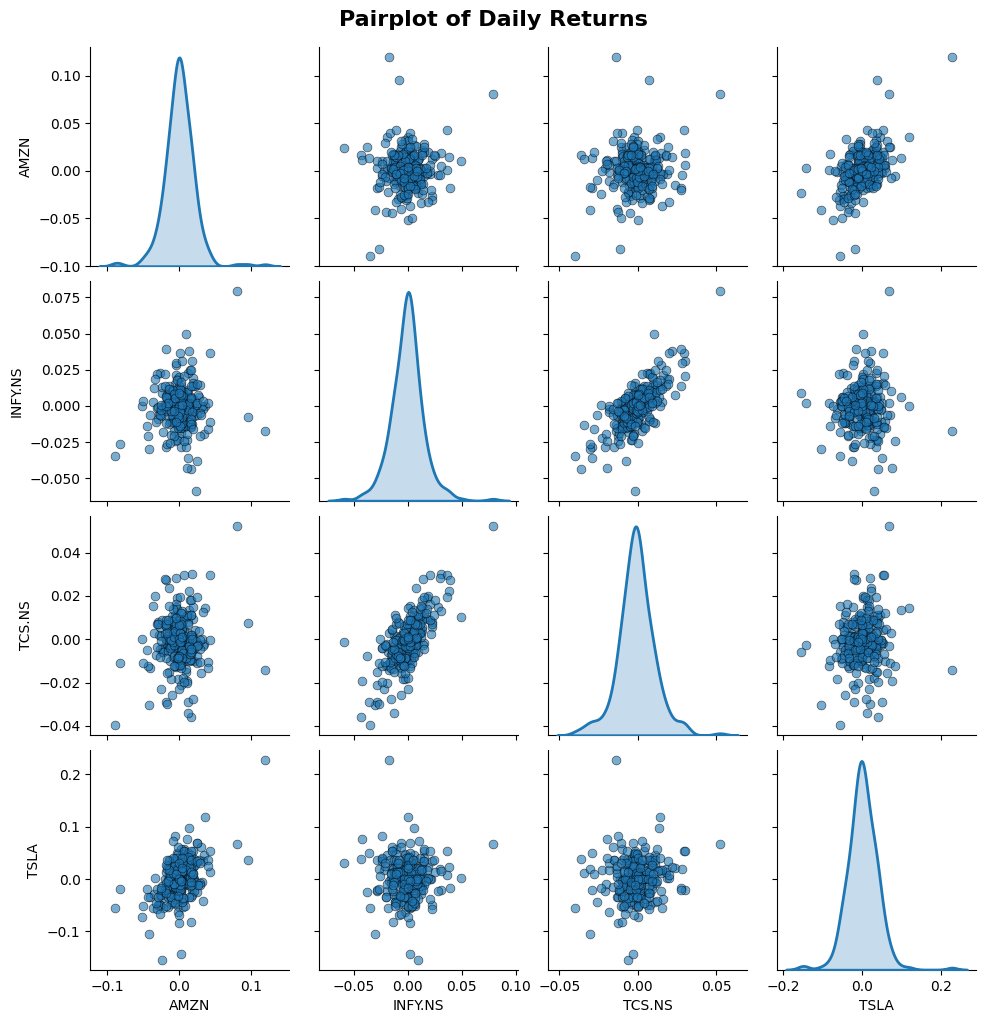

In [23]:
sns.pairplot(
    daily_returns.dropna(),
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'},
    diag_kws={'shade': True, 'linewidth': 2}
)
plt.suptitle("Pairplot of Daily Returns", fontsize=16, fontweight='bold', y=1.02)
plt.show()

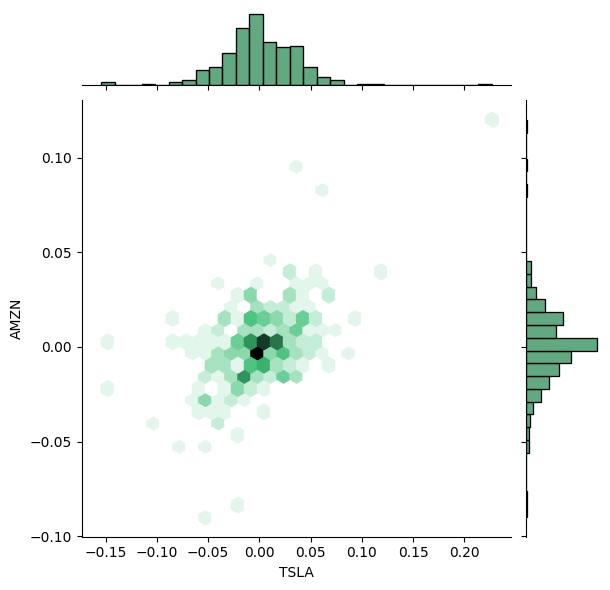

In [24]:
# Choose any two tickers dynamically
ticker_x, ticker_y = 'TSLA', 'AMZN'   # <-- swap these as needed

sns.jointplot(
    x=ticker_x,
    y=ticker_y,
    data=daily_returns,   # <-- use daily_returns instead of tech_rets
    kind='hex',
    color='seagreen'
)
plt.show()

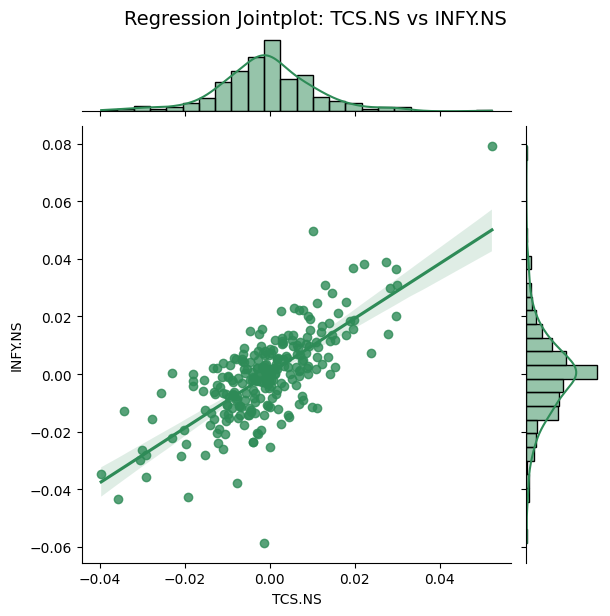

In [26]:
def plot_joint_reg(ticker_x, ticker_y, data=daily_returns, color='purple'):
    sns.jointplot(
        x=ticker_x,
        y=ticker_y,
        data=data,
        kind='reg',
        color=color
    )
    plt.suptitle(f"Regression Jointplot: {ticker_x} vs {ticker_y}", fontsize=14, y=1.02)
    plt.show()

# Example usage

plot_joint_reg('TCS.NS', 'INFY.NS', color='seagreen')

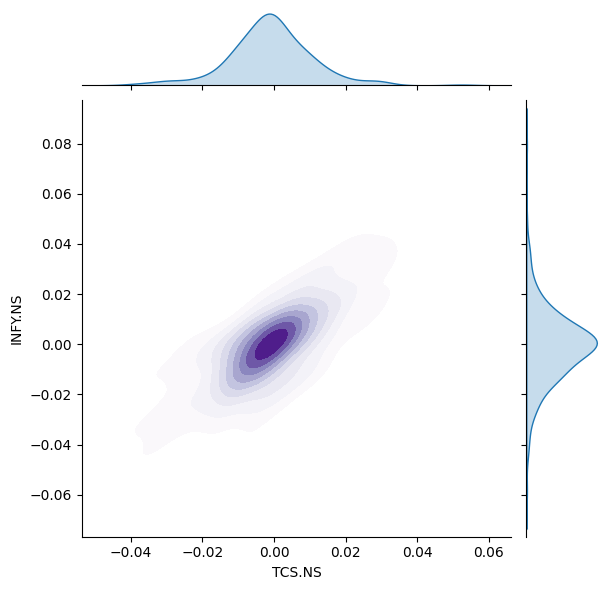

In [27]:
# KDE jointplot with filled contours
ticker_x, ticker_y = 'TCS.NS', 'INFY.NS'   # <-- choose any two tickers

sns.jointplot(
    x=ticker_x,
    y=ticker_y,
    data=daily_returns,   # <-- use daily_returns instead of tech_rets
    kind='kde',
    fill=True,
    cmap='Purples'        # optional: color map for nicer shading
)
plt.show()

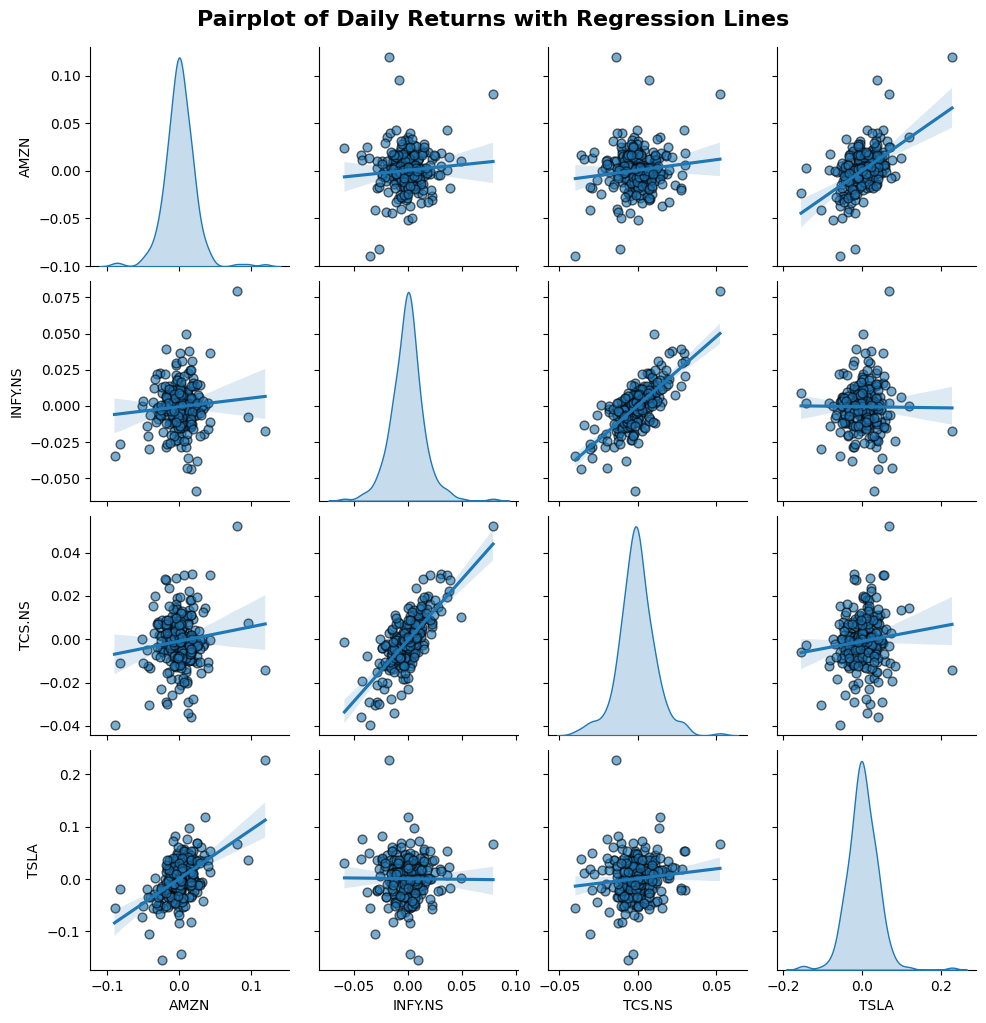

In [28]:
sns.pairplot(
    daily_returns.dropna(),
    kind='reg',
    plot_kws={'scatter_kws': {'alpha': 0.6, 's': 40, 'edgecolor': 'k'}},
    diag_kind='kde'
)
plt.suptitle("Pairplot of Daily Returns with Regression Lines", fontsize=16, fontweight='bold', y=1.02)
plt.show()


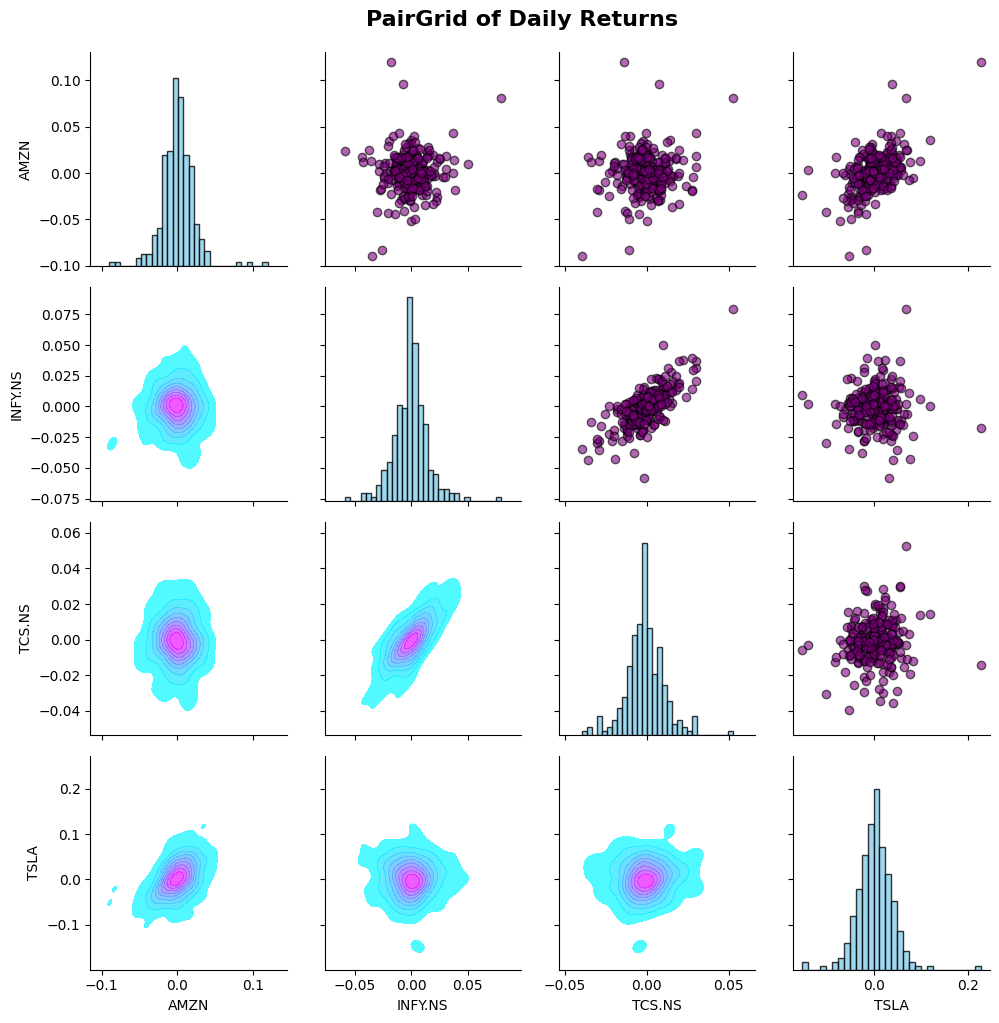

In [29]:
# Set up our figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(daily_returns.dropna())

# Upper triangle: scatter plots
returns_fig.map_upper(plt.scatter, color='purple', alpha=0.6, edgecolor='k')

# Lower triangle: KDE plots with filled contours
returns_fig.map_lower(sns.kdeplot, cmap='cool', fill=True, alpha=0.7)

# Diagonal: histograms of daily returns
returns_fig.map_diag(plt.hist, bins=30, edgecolor='black', color='skyblue', alpha=0.8)

# Add a main title
plt.suptitle("PairGrid of Daily Returns", fontsize=16, fontweight='bold', y=1.02)

plt.show()


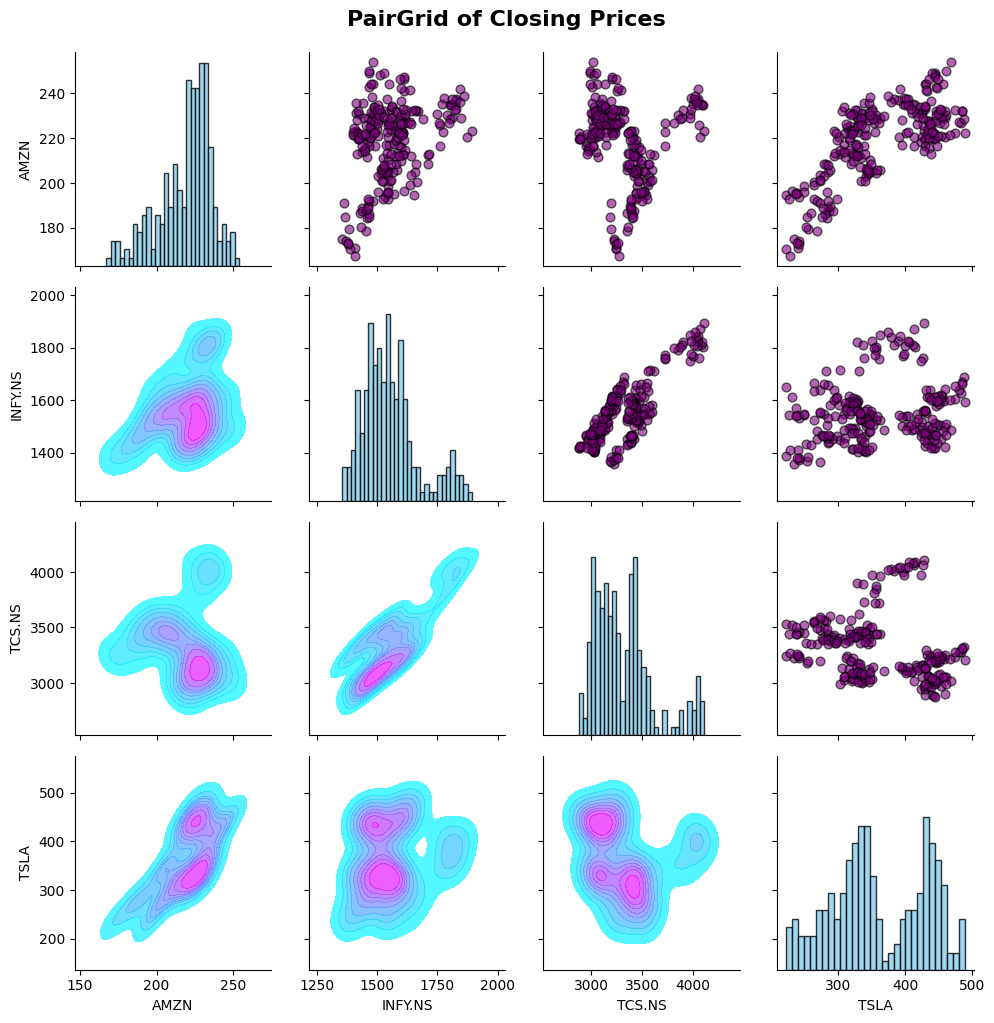

In [30]:
# PairGrid for closing prices (wide format DataFrame)
returns_fig = sns.PairGrid(closing_df.dropna())

# Upper triangle: scatter plots with styling
returns_fig.map_upper(
    plt.scatter,
    color='purple',
    alpha=0.6,
    edgecolor='k',
    s=40
)

# Lower triangle: KDE plots with filled contours
returns_fig.map_lower(
    sns.kdeplot,
    cmap='cool',
    fill=True,
    alpha=0.7
)

# Diagonal: histograms of closing prices
returns_fig.map_diag(
    plt.hist,
    bins=30,
    edgecolor='black',
    color='skyblue',
    alpha=0.8
)

# Add a main title
plt.suptitle("PairGrid of Closing Prices", fontsize=16, fontweight='bold', y=1.02)

plt.show()



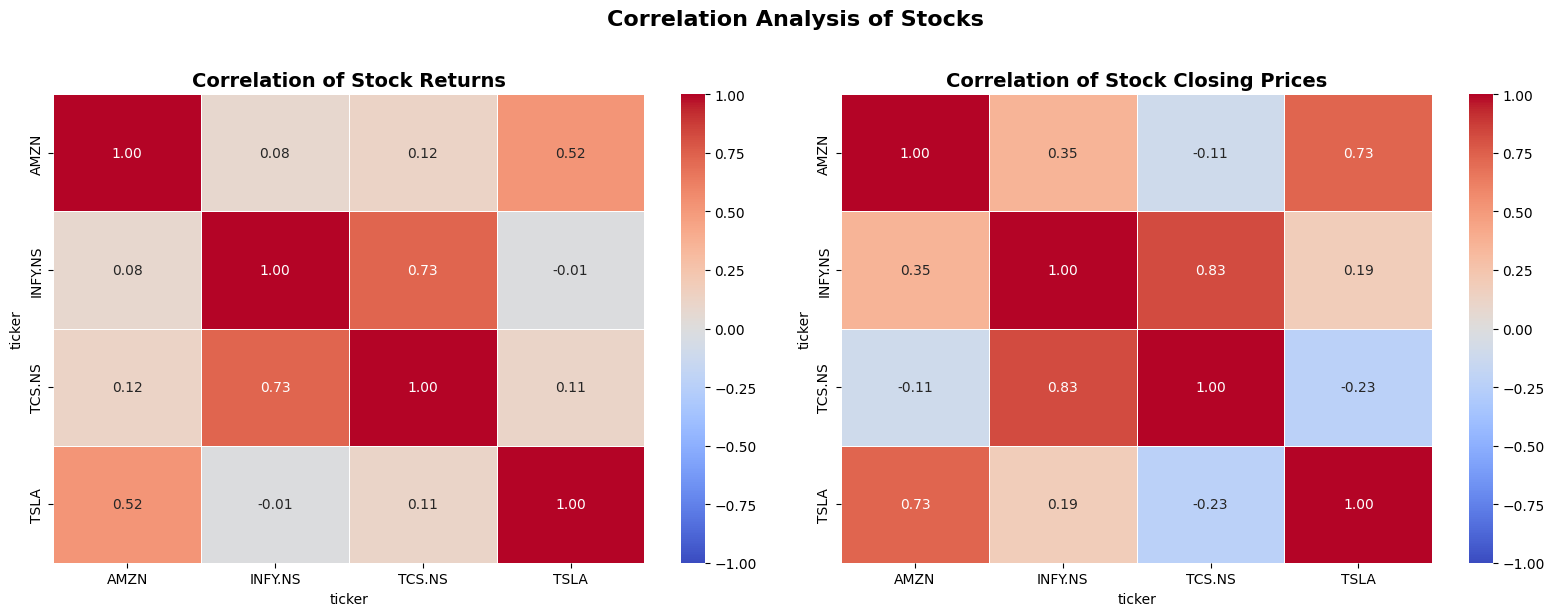

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Returns correlation
sns.heatmap(
    daily_returns.corr(),        # <-- use daily_returns instead of tech_rets
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    ax=axes[0],
    vmin=-1,
    vmax=1,
    center=0
)
axes[0].set_title('Correlation of Stock Returns', fontsize=14, fontweight='bold')

# Closing price correlation
sns.heatmap(
    closing_df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    ax=axes[1],
    vmin=-1,
    vmax=1,
    center=0
)
axes[1].set_title('Correlation of Stock Closing Prices', fontsize=14, fontweight='bold')

plt.suptitle("Correlation Analysis of Stocks", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

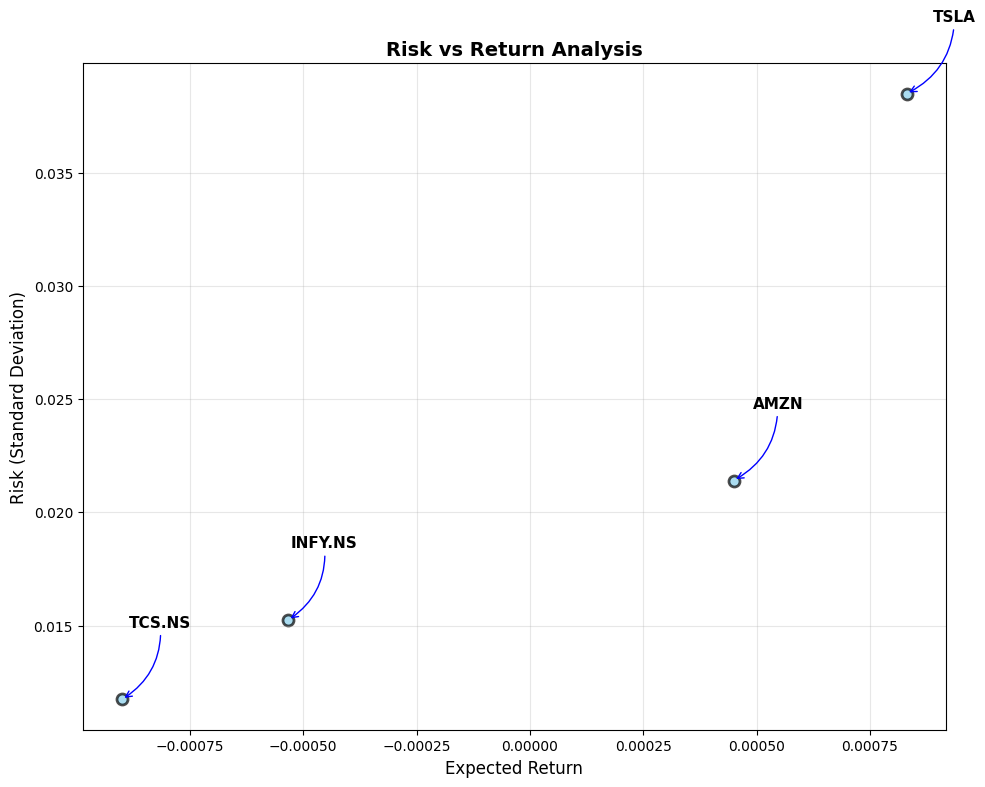

In [32]:
# Drop missing values from daily returns
rets = daily_returns.dropna()

area = np.pi * 20  # bubble size

plt.figure(figsize=(10, 8))

# Scatter plot of mean return vs standard deviation (risk)
plt.scatter(
    rets.mean(),
    rets.std(),
    s=area,
    alpha=0.7,
    edgecolors='black',
    linewidth=2,
    color='skyblue'
)

plt.xlabel('Expected Return', fontsize=12)
plt.ylabel('Risk (Standard Deviation)', fontsize=12)
plt.title('Risk vs Return Analysis', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Annotate each point with ticker label
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(50, 50),
        textcoords='offset points',
        ha='right',
        va='bottom',
        fontsize=11,
        fontweight='bold',
        arrowprops=dict(arrowstyle='->', color='blue', connectionstyle='arc3,rad=-0.3')
    )

plt.tight_layout()
plt.show()


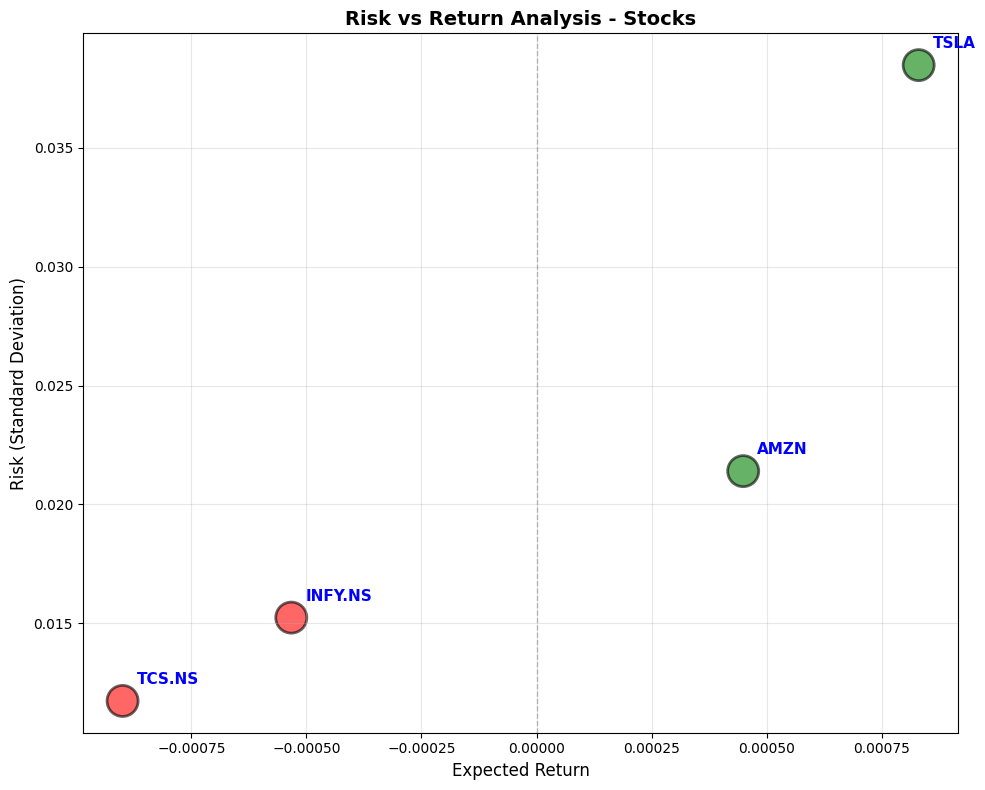

In [33]:
# Drop missing values from daily returns
rets = daily_returns.dropna()

plt.figure(figsize=(10, 8))

# Color code by expected return (green if positive, red if negative)
colors = ['green' if x > 0 else 'red' for x in rets.mean()]

# Scatter plot of mean return vs standard deviation (risk)
plt.scatter(
    rets.mean(),
    rets.std(),
    s=500,
    alpha=0.6,
    c=colors,
    edgecolors='black',
    linewidth=2
)

plt.xlabel('Expected Return', fontsize=12)
plt.ylabel('Risk (Standard Deviation)', fontsize=12)
plt.title('Risk vs Return Analysis - Stocks', fontsize=14, fontweight='bold')
plt.axvline(0, color='gray', linestyle='--', linewidth=1, alpha=0.5)  # Zero return line
plt.grid(True, alpha=0.3)

# Annotate stock tickers
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(10, 10),
        textcoords='offset points',
        ha='left',
        va='bottom',
        fontsize=11,
        fontweight='bold',
        color='blue'
    )

plt.tight_layout()
plt.show()

In [34]:
icker = input("Enter the stock ticker: ").strip().upper()

# Define start and end dates
start_date = '2012-01-01'
end_date = datetime.now()

# Download only the ticker the user enters
df = yf.download(ticker, start=start_date, end=end_date)

# Show basic info
print(f"Data shape: {df.shape}")
print(f"Date range: {df.index.min()} to {df.index.max()}")
print("\nFirst few rows:")
print(df.head())


Enter the stock ticker: TSLA


/tmp/ipython-input-981029860.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Data shape: (3529, 5)
Date range: 2012-01-03 00:00:00 to 2026-01-14 00:00:00

First few rows:
Price        Close    High     Low    Open     Volume
Ticker        AMZN    AMZN    AMZN    AMZN       AMZN
Date                                                 
2012-01-03  8.9515  8.9740  8.7775  8.7945  102216000
2012-01-04  8.8755  9.0250  8.8035  8.9605   84104000
2012-01-05  8.8805  8.9125  8.7025  8.7970   76182000
2012-01-06  9.1305  9.2325  8.8750  8.9035  140168000
2012-01-09  8.9280  9.2185  8.8500  9.1380  101138000


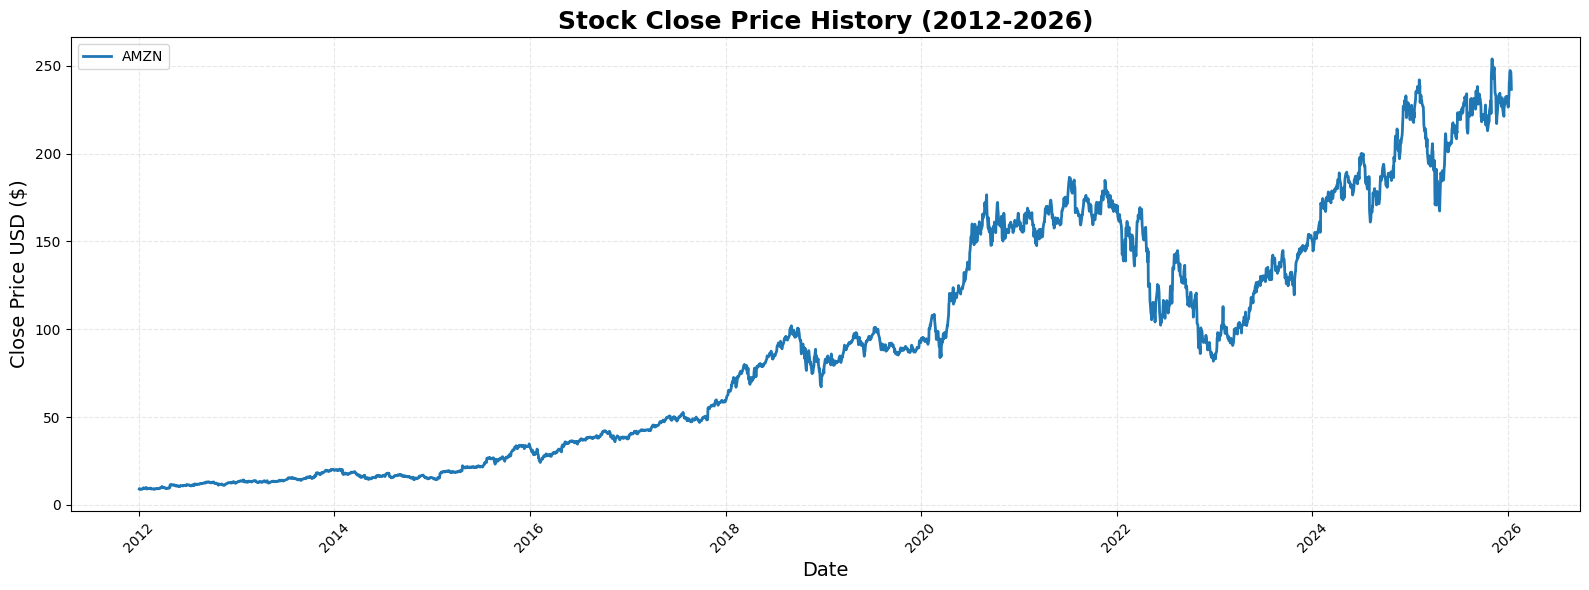

In [38]:
plt.figure(figsize=(16, 6))

for ticker in df['Close'].columns:
    plt.plot(df.index, df['Close'][ticker], linewidth=2, label=ticker)

plt.title(f"Stock Close Price History ({df.index.min().year}-{df.index.max().year})",
          fontsize=18, fontweight='bold')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [39]:


# Create a new dataframe with only the 'Close' column(s)
# If multiple tickers are downloaded, this keeps all their Close prices
data = df[['Close']].copy()

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on (80% train, 20% test)
training_data_len = int(np.ceil(len(dataset) * 0.80))

# Print summary
print(f"Total data points: {len(dataset)}")
print(f"Training data points: {training_data_len}")
print(f"Testing data points: {len(dataset) - training_data_len}")
print(f"Train-test split: {training_data_len/len(dataset)*100:.1f}% - {(1-training_data_len/len(dataset))*100:.1f}%")


Total data points: 3529
Training data points: 2824
Testing data points: 705
Train-test split: 80.0% - 20.0%


In [40]:
from sklearn.preprocessing import MinMaxScaler

# Split first, then scale
train_data = dataset[:training_data_len]
test_data = dataset[training_data_len:]

# Fit scaler ONLY on training data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_data)

# Transform test data using the same scaler
scaled_test = scaler.transform(test_data)

# Combine for LSTM sequence creation (but scaler learned only from train)
scaled_data = np.concatenate([scaled_train, scaled_test], axis=0)

print(f"Training data scaled: {scaled_train.shape}")
print(f"Test data scaled: {scaled_test.shape}")


Training data scaled: (2824, 1)
Test data scaled: (705, 1)


In [41]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
# Use 60 previous days to predict the next day
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

    # Debug: Print first 2 sequences only
    if i <= 61:
        print(f"Sequence {i-59}:")
        print(f"X (60 days): {x_train[-1][:5]}... (showing first 5)")
        print(f"Y (target): {y_train[-1]}")
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data for LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"Number of training sequences: {x_train.shape[0]}")


Sequence 1:
X (60 days): [0.00087189 0.00044438 0.00047251 0.00187879 0.0007397 ]... (showing first 5)
Y (target): 0.008066421706034416

Sequence 2:
X (60 days): [0.00044438 0.00047251 0.00187879 0.0007397  0.00095908]... (showing first 5)
Y (target): 0.007475781350144914

x_train shape: (2764, 60, 1)
y_train shape: (2764,)
Number of training sequences: 2764


In [42]:
# Modern import (TensorFlow 2.16+)
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with better hyperparameters
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.1, verbose=1)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 13s 126ms/step - loss: 0.0201 - val_loss: 0.0024
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - loss: 4.0828e-04 - val_loss: 0.0032
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 18s 110ms/step - loss: 4.0980e-04 - val_loss: 0.0023
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - loss: 3.6085e-04 - val_loss: 0.0023
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - loss: 4.1899e-04 - val_loss: 0.0034
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - loss: 5.1929e-04 - val_loss: 0.0026
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 3.5377e-04 - val_loss: 0.0021
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - loss: 2.8686e-04 - val_loss: 0.0019
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 2.8530e-04 - val_loss: 0.0016
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 2.9288e-04 - val_loss: 0.0017
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - loss: 3.1779e-04 - val_loss: 0.0013
Epoch 12/50
78/

In [43]:
# Create the testing data set
# Include 60 days before test period to have enough lookback data
test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]  # Actual prices for comparison

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data for LSTM [samples, time steps, features]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Convert back to actual prices

# Calculate evaluation metrics
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
mae = np.mean(np.abs(predictions - y_test))
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

print(f"\nModel Performance:")
print(f"RMSE: ${rmse:.2f}")
print(f"MAE: ${mae:.2f}")
print(f"MAPE: {mape:.2f}%")


x_test shape: (705, 60, 1)
y_test shape: (705, 1)
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step

Model Performance:
RMSE: $3.81
MAE: $2.75
MAPE: 1.50%


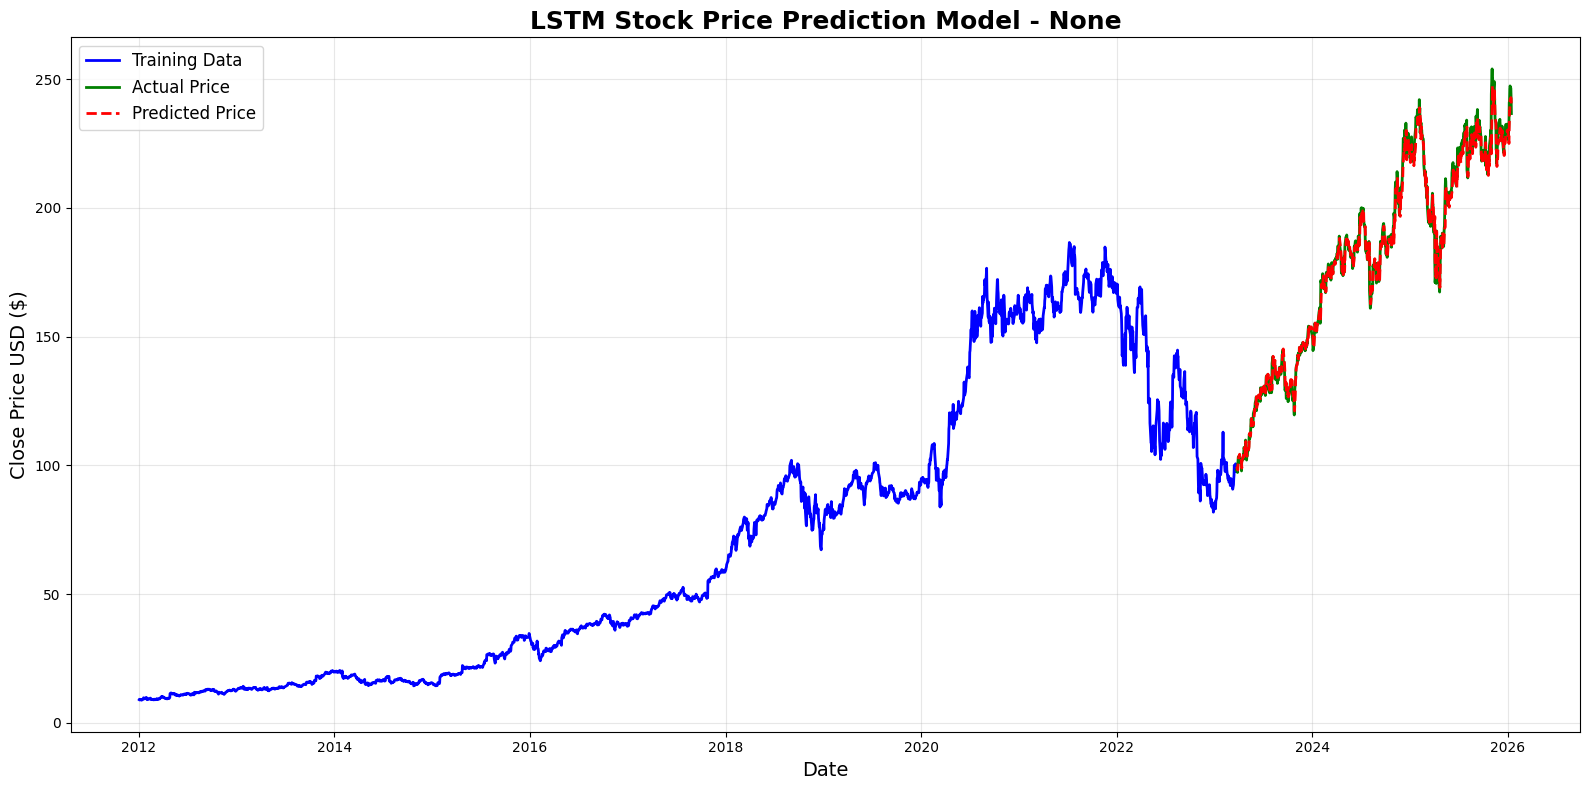

In [44]:
# Split into train and validation sets
train = data[:training_data_len]
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions

# Detect ticker name dynamically
ticker = df.columns.name if isinstance(df.columns, pd.MultiIndex) else 'TSLA'

# Visualize the data
plt.figure(figsize=(16, 8))
plt.title(f"LSTM Stock Price Prediction Model - {ticker}", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)

plt.plot(train.index, train['Close'], label='Training Data', linewidth=2, color='blue')
plt.plot(valid.index, valid['Close'], label='Actual Price', linewidth=2, color='green')
plt.plot(valid.index, valid['Predictions'], label='Predicted Price', linewidth=2, linestyle='--', color='red')

plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


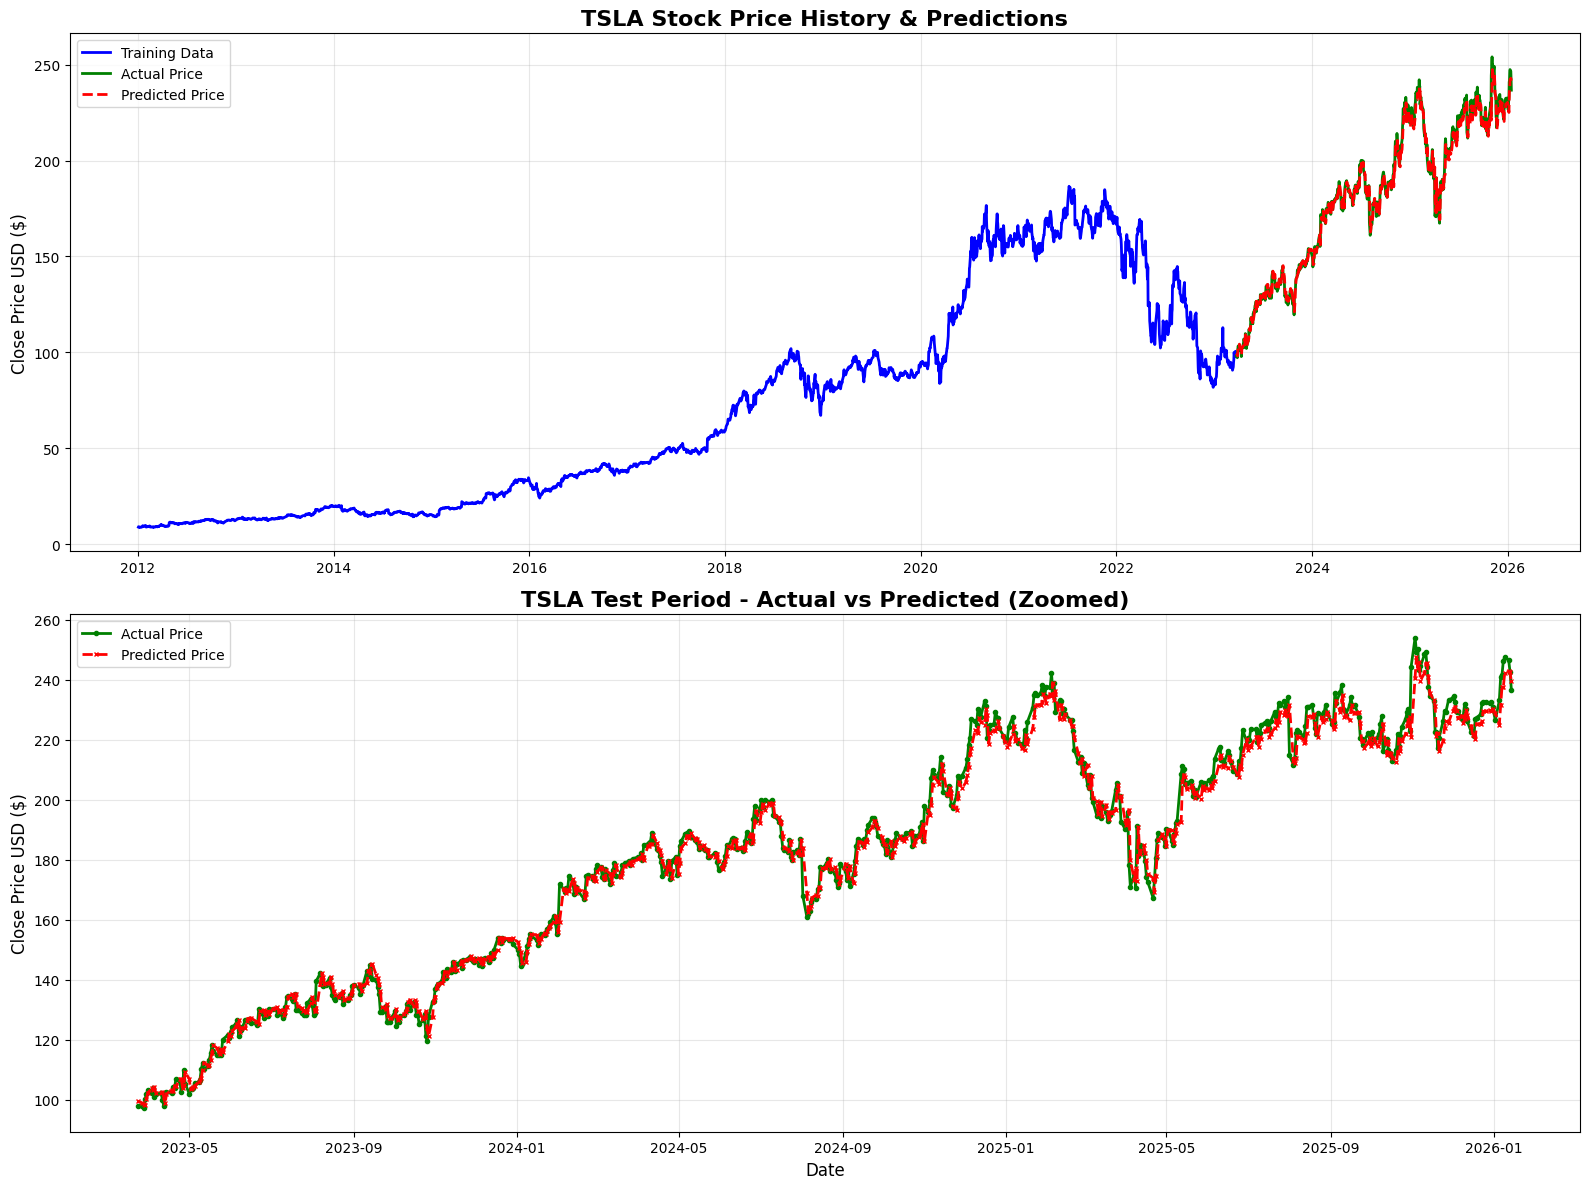

In [45]:
# Split into train and validation sets
train = data[:training_data_len]
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions

# Detect ticker name dynamically
ticker = 'TSLA' if 'TSLA' in df.columns or 'Close' in df.columns else 'Stock'

# Create subplots: full history + zoomed test period
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Full history plot
ax1.set_title(f'{ticker} Stock Price History & Predictions', fontsize=16, fontweight='bold')
ax1.plot(train.index, train['Close'], label='Training Data', linewidth=2, color='blue')
ax1.plot(valid.index, valid['Close'], label='Actual Price', linewidth=2, color='green')
ax1.plot(valid.index, valid['Predictions'], label='Predicted Price', linewidth=2, linestyle='--', color='red')
ax1.set_ylabel('Close Price USD ($)', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Zoomed test period
ax2.set_title(f'{ticker} Test Period - Actual vs Predicted (Zoomed)', fontsize=16, fontweight='bold')
ax2.plot(valid.index, valid['Close'], label='Actual Price', linewidth=2, color='green', marker='o', markersize=3)
ax2.plot(valid.index, valid['Predictions'], label='Predicted Price', linewidth=2, linestyle='--', color='red', marker='x', markersize=3)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Close Price USD ($)', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [46]:
# Predict next n days dynamically
def predict_future_days(model, data, scaler, n_days=7, lookback=60):
    # Get last `lookback` days of data
    last_days = data[-lookback:].values
    last_days_scaled = scaler.transform(last_days)

    # Store predictions
    future_predictions = []
    current_batch = last_days_scaled.reshape((1, lookback, 1))

    for i in range(n_days):
        # Predict next day
        current_pred = model.predict(current_batch, verbose=0)[0]
        future_predictions.append(current_pred[0])

        # Update batch: remove first day, add prediction
        current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

    # Convert predictions back to original scale
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    return future_predictions

# Get future predictions
future_prices = predict_future_days(model, data[['Close']], scaler, n_days=7)

# Create future dates
from datetime import timedelta
last_date = df.index[-1]
future_dates = [last_date + timedelta(days=i+1) for i in range(len(future_prices))]

# Display predictions
print("Next 7 Days Stock Price Predictions:")
print("-" * 40)
for date, price in zip(future_dates, future_prices):
    print(f"{date.strftime('%Y-%m-%d')}: ${price[0]:.2f}")

Next 7 Days Stock Price Predictions:
----------------------------------------
2026-01-15: $234.57
2026-01-16: $233.27
2026-01-17: $231.95
2026-01-18: $230.50
2026-01-19: $228.88
2026-01-20: $227.16
2026-01-21: $225.39


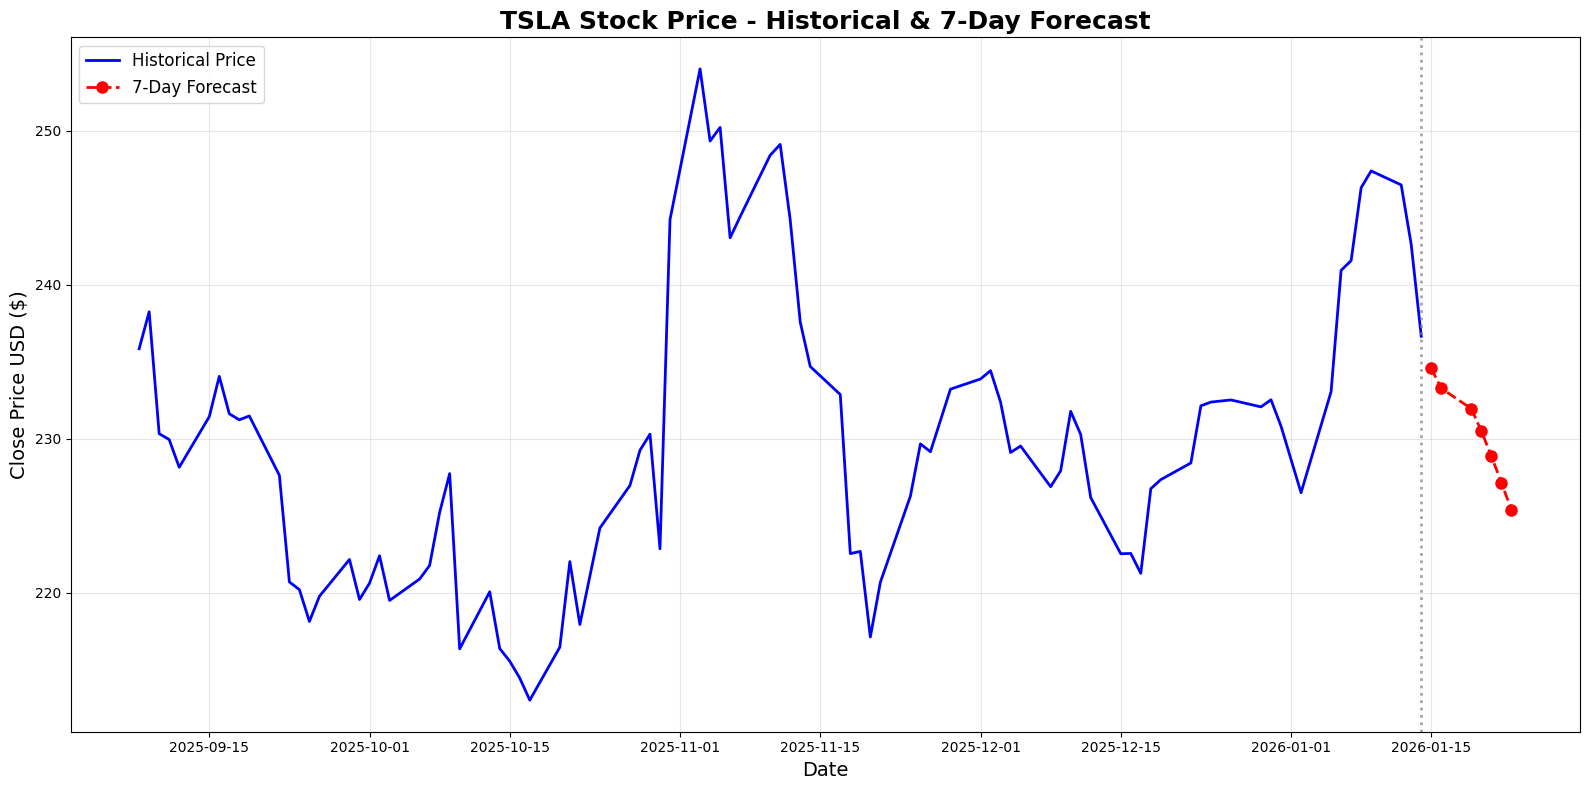


7-Day Forecast:
Thursday, January 15, 2026: $234.57
Friday, January 16, 2026: $233.27
Monday, January 19, 2026: $231.95
Tuesday, January 20, 2026: $230.50
Wednesday, January 21, 2026: $228.88
Thursday, January 22, 2026: $227.16
Friday, January 23, 2026: $225.39


In [47]:
# Predict next 7 days
future_prices = predict_future_days(model, data[['Close']], scaler, n_days=7)

# Create future dates (skip weekends for stock market)
last_date = df.index[-1]
future_dates = pd.bdate_range(start=last_date + timedelta(days=1), periods=len(future_prices))

# Create DataFrame for future predictions
future_df = pd.DataFrame(future_prices, index=future_dates, columns=['Predictions'])

# Detect ticker name dynamically
ticker = 'TSLA' if 'TSLA' in df.columns or 'Close' in df.columns else 'Stock'

# Plot historical + future predictions
plt.figure(figsize=(16, 8))
plt.title(f'{ticker} Stock Price - Historical & {len(future_prices)}-Day Forecast',
          fontsize=18, fontweight='bold')

# Plot last 90 days of actual data
plt.plot(data[-90:].index, data[-90:]['Close'], label='Historical Price',
         linewidth=2, color='blue')

# Plot future predictions
plt.plot(future_df.index, future_df['Predictions'], label=f'{len(future_prices)}-Day Forecast',
         linewidth=2, linestyle='--', marker='o', markersize=8, color='red')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.axvline(x=last_date, color='gray', linestyle=':', linewidth=2, alpha=0.7, label='Today')
plt.tight_layout()
plt.show()

# Print predictions
print(f"\n{len(future_prices)}-Day Forecast:")
for date, price in zip(future_dates, future_prices):
    print(f"{date.strftime('%A, %B %d, %Y')}: ${price[0]:.2f}")


In [48]:
n_days = 7
future_prices = predict_future_days(model, data[['Close']], scaler, n_days=n_days)

# Business days only
future_dates = pd.bdate_range(start=last_date + timedelta(days=1), periods=n_days)

forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price': future_prices.flatten(),
    'Day': [d.strftime('%A') for d in future_dates]
})

In [49]:
print(f"\n{n_days}-Day Forecast:")
print("-" * 40)
for date, price in zip(forecast_df['Date'], forecast_df['Predicted_Price']):
    print(f"{date.strftime('%A, %B %d, %Y')}: ${price:.2f}")


7-Day Forecast:
----------------------------------------
Thursday, January 15, 2026: $234.57
Friday, January 16, 2026: $233.27
Monday, January 19, 2026: $231.95
Tuesday, January 20, 2026: $230.50
Wednesday, January 21, 2026: $228.88
Thursday, January 22, 2026: $227.16
Friday, January 23, 2026: $225.39


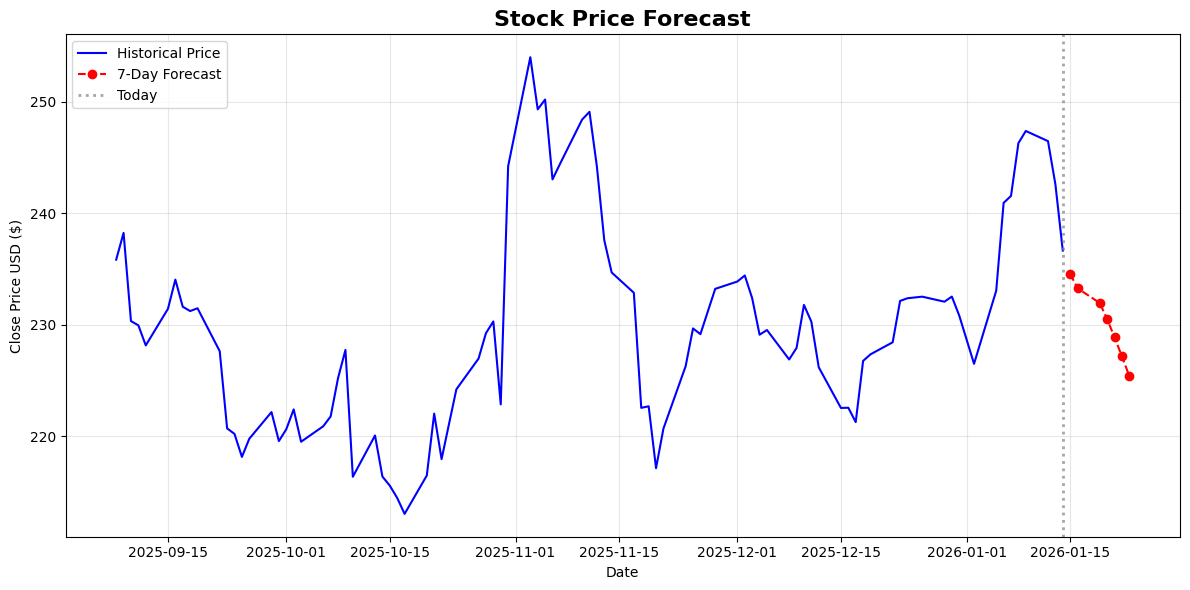

In [51]:
plt.figure(figsize=(12,6))
plt.plot(data[-90:].index, data['Close'][-90:], label='Historical Price', color='blue')
plt.plot(forecast_df['Date'], forecast_df['Predicted_Price'],
         label=f'{n_days}-Day Forecast', color='red', linestyle='--', marker='o')
plt.axvline(x=last_date, color='gray', linestyle=':', linewidth=2, alpha=0.7, label='Today')
plt.title("Stock Price Forecast", fontsize=16, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Close Price USD ($)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [52]:
from sklearn.metrics import mean_absolute_error, r2_score

# Root Mean Squared Error
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))

# Mean Absolute Percentage Error
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

# Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)

# R² Score (coefficient of determination)
r2 = r2_score(y_test, predictions)

# Print results
print("\nModel Performance Metrics:")
print(f"RMSE: ${rmse:.2f}")
print(f"MAE:  ${mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R² Score: {r2:.3f}")



Model Performance Metrics:
RMSE: $3.81
MAE:  $2.75
MAPE: 1.50%
R² Score: 0.991


In [53]:
# Choose ticker dynamically (set manually or infer from df)
ticker = 'TSLA'   # change this if you trained on another stock

try:
    print(model.summary())
    print("\n✓ Model is ready to save!")

    # Save model with ticker in filename
    model_filename = f"{ticker.lower()}_stock_lstm.h5"
    model.save(model_filename)

    # Save scaler
    import pickle
    scaler_filename = f"{ticker.lower()}_scaler.pkl"
    with open(scaler_filename, 'wb') as f:
        pickle.dump(scaler, f)

    # Download files (Colab only)
    from google.colab import files
    files.download(model_filename)
    files.download(scaler_filename)

    print(f"✅ Files saved and downloaded as {model_filename} and {scaler_filename}!")

except NameError:
    print("✗ Model not found!")
    print("\n⚠️ Please run these cells first:")
    print("1. Build model cell (with Sequential, LSTM...)")
    print("2. Train model cell (model.fit...)")
    print("\nThen try saving again.")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

None

✓ Model is ready to save!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Files saved and downloaded as tsla_stock_lstm.h5 and tsla_scaler.pkl!


In [ ]:
model.save('apple_stock_lstm.h5')

import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

from google.colab import files
files.download('apple_stock_lstm.h5')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>